### Import The Necessary Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
# loading the data in dataframe
house_price= sklearn.datasets.load_boston()
house =pd.DataFrame( house_price.data ,columns=house_price.feature_names )

In [3]:
# print fist 5 rows of our dataset
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# add the price column to our dataset
house["price"] = house_price.target

In [5]:
# print first 5 rows of our dataset after add thr target
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# print the shape of our dataset
house.shape

(506, 14)

In [7]:
# check the missing value
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [8]:
# statistical measures of the dataset
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


from the result 
* we need to make scaler to our data
* the mean of the columns have a large variance

In [9]:
# the correlation between the columns 
house.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

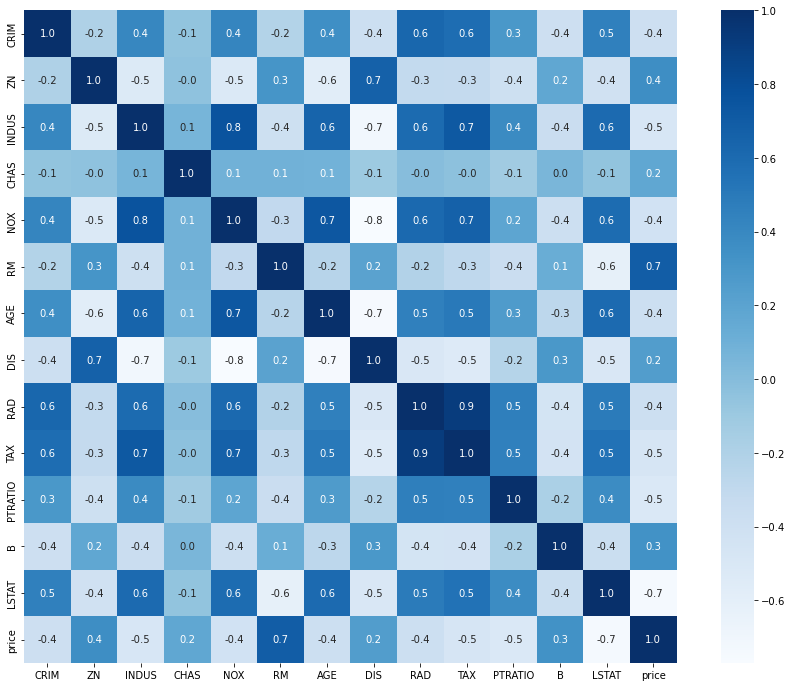

In [10]:
# show the corr in heatmap
plt.figure(figsize=(16,12))
sns.heatmap(house.corr() , annot=True, cbar= True , square=True ,  fmt='.1f' , cmap="Blues")

In [11]:
# splitting the data and target
X = house.drop(["price"] , axis=1)
y = house["price"]

In [12]:
# print shape of data and target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [13]:
# splitting the data into Training data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , random_state=44 , shuffle=True ,test_size=0.2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


### Model Training

In [15]:
# load the linearRegresssion
from sklearn.linear_model import LinearRegression

In [16]:
# loading the model
model = LinearRegression()

In [17]:
# training the model with X_train
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

### Prediction on training data

In [18]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [19]:
training_data_prediction

array([23.25534537, 11.39687062, 23.46794271, 25.49911865, 20.37260016,
       26.37655347, 19.12346026, 17.24498095, 34.11345242, 23.38906664,
       34.8014205 , 31.33527361, 30.71416815, 20.33255448, 27.78013665,
       35.07464062,  8.05354343, 19.30526539, 40.90096762, 24.33722558,
       19.3600286 , 23.93464472, 24.98705968, 30.15479085, 23.88633482,
       17.15690183, 23.83032426, 22.79149852, 19.37682158, 26.09910766,
       20.55395315, 21.37935868, 15.91205937, 23.61631052, 35.67315393,
       29.37277204, 14.33957554, 12.67647043, 18.39660631, 18.14768608,
       19.12024124, 39.34735541, 23.91348851, 27.48518088, 28.57401175,
       23.53607902, 37.21641145, 26.32407515, 19.5321581 , 16.89627479,
       27.70807008, 12.55835666, 33.51455499, 36.72384759, 22.87711738,
       22.92147649, 20.28443204, 38.21048527, 27.56902853, 32.59302515,
        5.49469559, 15.99029034, 36.76563299, 17.55688443, 22.89087798,
       20.36354896, 30.58452564, 20.76231719, 22.4670728 , 18.48

In [20]:
from sklearn import metrics
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.733565792886427
Mean Absolute Error :  3.3312230835775134


### Visualizing the actual Prices and predicted prices

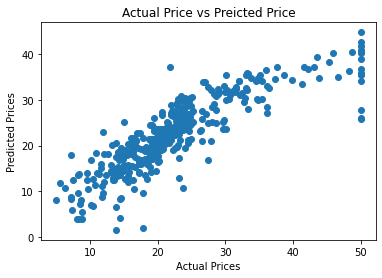

In [21]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()